### step 1 : Import Libraries  


In [268]:

import numpy as np 
import matplotlib.pyplot as plt 
import cv2   


### step - 2 

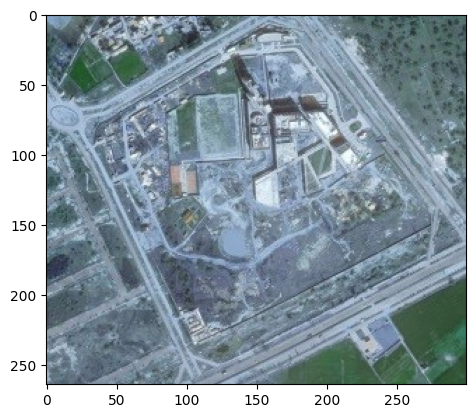

In [269]:
#load_image
sat_image = cv2.imread("sat_image_plaksha.jpg")
plt.imshow(sat_image)


### step-3

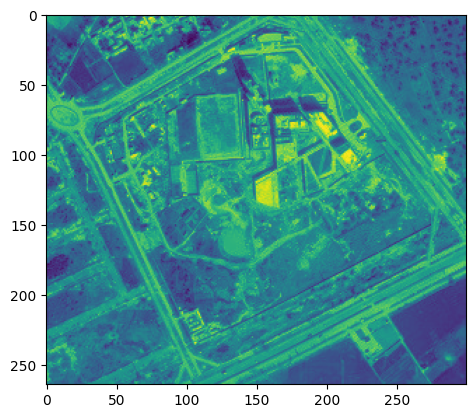

In [270]:
#convert the image into grey-scale 
grey_sat_image = cv2.cvtColor(sat_image , cv2.COLOR_BGR2GRAY)
plt.imshow(grey_sat_image)
#grey_sat_image.shape() -> ( 264 , 300 )

### step-4 

In [271]:
#convert the image to double precision
grey_sat_image_double = grey_sat_image.astype(np.float64)
#print(grey_sat_image_double.dtype)

### step 5 

In [272]:
#print(grey_sat_image_double.shape)
#calculating mean of each coloumn (there are 300 coloums in total )
mean_col = np.mean(grey_sat_image_double, axis=0)
# for mean in mean_col:
#     print(mean)

In [273]:
#subtracting coloumn mean from each pixel to get  image_mean_subtracted.
image_mean_subtracted = grey_sat_image_double - mean_col
new_mean = np.mean(image_mean_subtracted , axis = 0)
'''we subtracte coloumn mean from each pixel inorder to make the data centred . 
PCA assumes that data is centred around zero . Our covariance matrix gets affected 
and as a result , we have a great chance that wrong Principle components being evaluated for analysis . 

'''

'we subtracte coloumn mean from each pixel inorder to make the data centred . \nPCA assumes that data is centred around zero . Our covariance matrix gets affected \nand as a result , we have a great chance that wrong Principle components being evaluated for analysis . \n\n'

### step - 6


In [274]:
#Computing the co variance matrix using numpy 
cov_matrix = np.cov(image_mean_subtracted, rowvar=False)
'''we must use rowvar = false since by default , np.cov() assumes that each row
as a variable and coloumn as observation . But in PCA , we do the inverse logic of it since our main target here is 
coloumn .
'''
#print(cov_matrix.shape)
cov_matrix



array([[1518.87589296, 1343.12579214, 1121.83208031, ..., -167.01493548,
        -126.55036583, -139.92042574],
       [1343.12579214, 1545.76489227, 1265.9413815 , ..., -140.70183777,
         -89.85392902,  -73.36280101],
       [1121.83208031, 1265.9413815 , 1425.59659811, ..., -144.06704401,
         -86.40752103,  -38.05082671],
       ...,
       [-167.01493548, -140.70183777, -144.06704401, ..., 1254.67990264,
        1140.29068729, 1075.81819622],
       [-126.55036583,  -89.85392902,  -86.40752103, ..., 1140.29068729,
        1184.58519127, 1148.42033932],
       [-139.92042574,  -73.36280101,  -38.05082671, ..., 1075.81819622,
        1148.42033932, 1233.26545397]], shape=(300, 300))

### step - 7 and 8 



In [275]:
#computing eigen values and eigen vectors.
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#sorting eigenvalues 
#by defalut , these are sorted in ascending order 
'''
we need to sort the evalues in such a way that we have largerst evalues (for which we believe that they can most of features )

'''
# in descending order 
desc_order_evalues = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[desc_order_evalues]
#sorting the evectors
sorted_eigenvectors = eigenvectors[:, desc_order_evalues]

'''
Instead of using np.linalg.eig() , I used the np.linalg.eigh() due to the fact 
that eig() was also taking imaginary part of eigenvalues into consideration which are 
not compatible to be convertable in float.
'''
print(sorted_eigenvalues[:5])

[56329.41125092 36634.00158313 29399.48126706 22848.62235279
 17350.88317204]


### Step-9

In [276]:
#Define the number of principal components to keep.
num_components = [10, 20, 30, 40, 50, 60, 91]

# each entry represents the number of first k eigenvectors that are needed to be used for analysis 



### step 10 

In [277]:
output_images = []

for k in num_components:
    #take top-k eigenvectors 
    selected_comp = sorted_eigenvectors[: , :k]
    #project the data onto selected components 
    projected_data = np.dot(selected_comp.T , image_mean_subtracted.T).T

    #reconstruct the image back  
    reconstructed_image = np.dot(selected_comp , projected_data.T).T + mean_col
    
    #append the reconstructed image 
    output_images.append(reconstructed_image)
    

### step - 11 

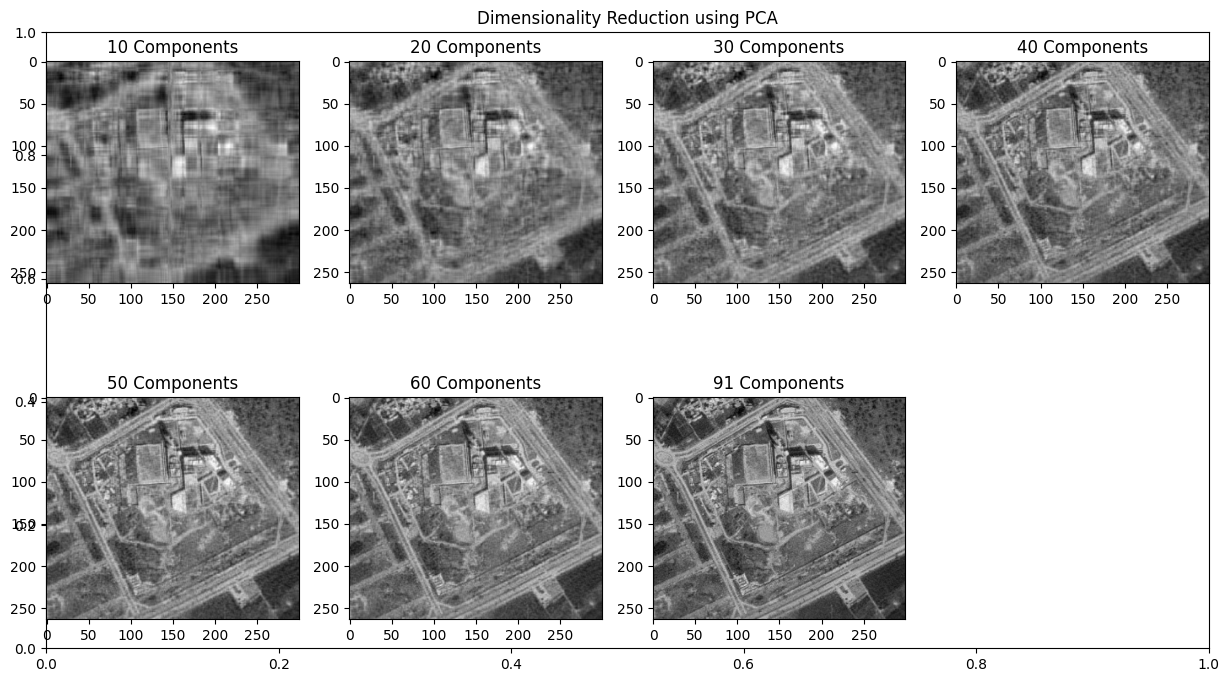

In [278]:
plt.figure(figsize=(15, 8))

plt.title("Dimensionality Reduction using PCA")

for i in range(len(output_images)):

    plt.subplot(2, 4, i + 1)
    plt.imshow(output_images[i], cmap="gray")
    plt.title(f"{num_components[i]} Components")
plt.show()


### step 12 

In [279]:
# direct PCA implementation using in-buit function  :

from sklearn.decomposition import PCA
num_components = 91
pca = PCA(num_components)
pca.fit(image_mean_subtracted)
#printing the amount of variance explained
variance = pca.explained_variance_ratio_
cummu_var = variance.sum()
print(cummu_var)




0.9505785631863113
